In [176]:
import torch

In [177]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [178]:
import torch.nn as nn

In [226]:
X = torch.linspace(1,50,50).reshape(-1,1)   # -1 is a placeholder calculates the dimension automatically

In [227]:
e = torch.randint(0,1,(50,1),dtype=torch.float)

In [228]:
y = 2*X - 1

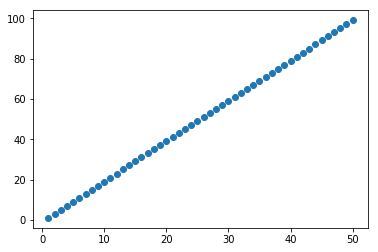

In [229]:
plt.scatter(X.numpy(),y.numpy())

In [230]:
model = nn.Linear(1,1)
print(model.weight)
print(model.bias)

Parameter containing:
tensor([[-0.4671]], requires_grad=True)
Parameter containing:
tensor([0.8193], requires_grad=True)


In [231]:
class Model(nn.Module):
    
    def __init__(self,in_features,out_features):
        
        super().__init__()
        self.linear = nn.Linear(in_features,out_features)
        
    def forward(self,x):
        y_pred = self.linear(x)
        return y_pred

In [232]:
model = Model(1,1)

print(model.linear.weight)
print(model.linear.bias)

Parameter containing:
tensor([[-0.3976]], requires_grad=True)
Parameter containing:
tensor([0.1396], requires_grad=True)


In [233]:
for name,param in model.named_parameters():
    print(name,'\t',param.item())

linear.weight 	 -0.3975948095321655
linear.bias 	 0.1395951509475708


In [234]:
x = torch.tensor([2.0])

In [235]:
print(model.forward(x))

tensor([-0.6556], grad_fn=<AddBackward0>)


In [236]:
x1 = np.linspace(0.0,50.0,50)

In [237]:
x1

array([ 0.        ,  1.02040816,  2.04081633,  3.06122449,  4.08163265,
        5.10204082,  6.12244898,  7.14285714,  8.16326531,  9.18367347,
       10.20408163, 11.2244898 , 12.24489796, 13.26530612, 14.28571429,
       15.30612245, 16.32653061, 17.34693878, 18.36734694, 19.3877551 ,
       20.40816327, 21.42857143, 22.44897959, 23.46938776, 24.48979592,
       25.51020408, 26.53061224, 27.55102041, 28.57142857, 29.59183673,
       30.6122449 , 31.63265306, 32.65306122, 33.67346939, 34.69387755,
       35.71428571, 36.73469388, 37.75510204, 38.7755102 , 39.79591837,
       40.81632653, 41.83673469, 42.85714286, 43.87755102, 44.89795918,
       45.91836735, 46.93877551, 47.95918367, 48.97959184, 50.        ])

In [238]:
y1 = model.linear.weight.item()*x1 + model.linear.bias.item()

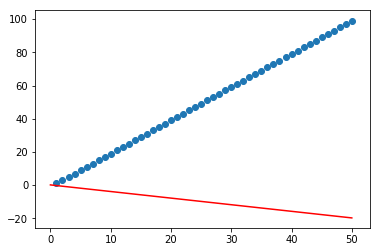

In [239]:
plt.plot(x1,y1,'r')
plt.scatter(X.numpy(),y.numpy())

In [240]:
criterion = nn.MSELoss()

In [241]:
optimizer = torch.optim.SGD(model.parameters(),lr=0.001)  

In [242]:
epochs = 50
losses = []

for i in range(epochs):
    i = i + 1
    y_pred = model.forward(X)
    loss = criterion(y_pred,y)
    
    losses.append(loss)
    
    print(f"epoch {i} loss: {loss.item()} weight: {model.linear.weight.item()} bias:{model.linear.bias.item()}")
    
    optimizer.zero_grad()

    loss.backward()
    optimizer.step()
    

epoch 1 loss: 4797.005859375 weight: -0.3975948095321655 bias:0.1395951509475708
epoch 2 loss: 2476.693115234375 weight: 3.6609559059143066 bias:0.25959330797195435
epoch 3 loss: 1278.799560546875 weight: 0.7448551654815674 bias:0.17236536741256714
epoch 4 loss: 660.3695678710938 weight: 2.8401482105255127 bias:0.2340330183506012
epoch 5 loss: 341.0961608886719 weight: 1.3346779346466064 bias:0.18871739506721497
epoch 6 loss: 176.26646423339844 weight: 2.4164113998413086 bias:0.22027137875556946
epoch 7 loss: 91.17060852050781 weight: 1.6391992568969727 bias:0.19659385085105896
epoch 8 loss: 47.238502502441406 weight: 2.1976678371429443 bias:0.21260149776935577
epoch 9 loss: 24.557767868041992 weight: 1.7964295148849487 bias:0.20009523630142212
epoch 10 loss: 12.848358154296875 weight: 2.0847551822662354 bias:0.20807713270187378
epoch 11 loss: 6.803035736083984 weight: 1.877618670463562 bias:0.20133846998214722
epoch 12 loss: 3.68188738822937 weight: 2.0264790058135986 bias:0.205177232

Text(0.5, 0, 'Epoch')

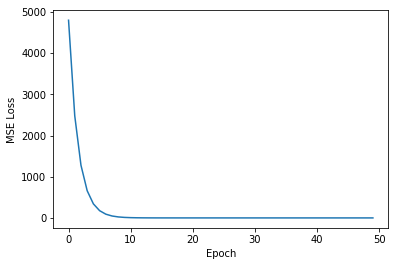

In [243]:
plt.plot(range(epochs),losses)
plt.ylabel('MSE Loss')
plt.xlabel('Epoch')

In [244]:
x = np.linspace(0.0,50.0,50)
current_weight = model.linear.weight.item()
current_bias = model.linear.weight.item()
predicted_y = current_weight*x + current_bias

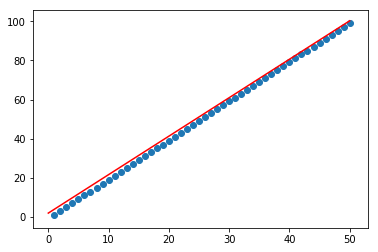

In [245]:
plt.plot(x,predicted_y,'r')
plt.scatter(X.numpy(),y.numpy())